In [13]:
 # trainning the model
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX,trainY,batch_size=BS),
    steps_per_epoch=len(trainX)//BS,
    validation_data=(testX,testY),
    validation_steps=len(testX)//BS,
    epochs=EPOCHS)

[INFO] training head...
Epoch 1/2
129/129 [==============================] - 265s 2s/step - loss: 0.2643 - accuracy: 0.9091 - val_loss: 0.0495 - val_accuracy: 0.9826
Epoch 2/2
129/129 [==============================] - 268s 2s/step - loss: 0.0784 - accuracy: 0.9793 - val_loss: 0.0392 - val_accuracy: 0.9856


In [14]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each and every image in the testing set, we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# printing the classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
     target_names=lb.classes_))

# saving the model
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] evaluating network...
              precision    recall  f1-score   support

    withmask       0.99      0.98      0.99      1177
 withoutmask       0.98      0.99      0.99      1182

    accuracy                           0.99      2359
   macro avg       0.99      0.99      0.99      2359
weighted avg       0.99      0.99      0.99      2359

[INFO] saving mask detector model...


D:\anaconda\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


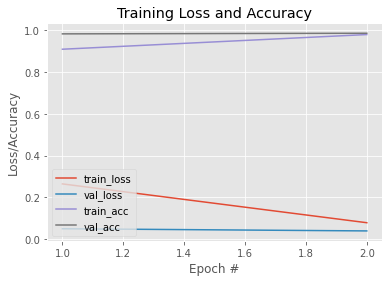

In [15]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, N+1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, N+1), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, N+1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, N+1), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")